In [2]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

In [77]:
import pandas as pd
import numpy as np
df = pd.read_csv('../NIFTY50_all.csv')

In [78]:
from datetime import datetime
from sklearn.impute import SimpleImputer
df['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in df['Date']]
df1 = df.drop(['Trades', 'Deliverable Volume', 'Series'], axis=1)
ls1 = ['MUNDRAPORT', 'UTIBANK', 'BAJAUTOFIN', 'BHARTI', 'HEROHONDA',
       'HINDALC0', 'HINDLEVER', 'INFOSYSTCH', 'JSWSTL', 'KOTAKMAH', 'TELCO',
       'TISCO', 'UNIPHOS', 'SESAGOA', 'SSLT', 'ZEETELE']
ls2 = ['ADANIPORTS', 'AXISBANK', 'BAJFINANCE', 'BHARTIARTL', 'HEROMOTOCO',
       'HINDALCO', 'HINDUNILVR', 'INFY', 'JSWSTEEL', 'KOTAKBANK', 'TATAMOTORS',
       'TATASTEEL', 'UPL', 'VEDL', 'VEDL', 'ZEEL']
df1['Symbol'] = df1['Symbol'].replace(ls1, ls2)
df1['Symbol'] = pd.Categorical(df1['Symbol'])

In [79]:
df2 = pd.get_dummies(data=df1, drop_first=True)
df2['Date']=df2['Date'].map(datetime.toordinal)
imp = SimpleImputer()
p = imp.fit_transform(df2)
df1['%Deliverble'] = p[:, 10]
df1.to_csv('cleaned.csv')

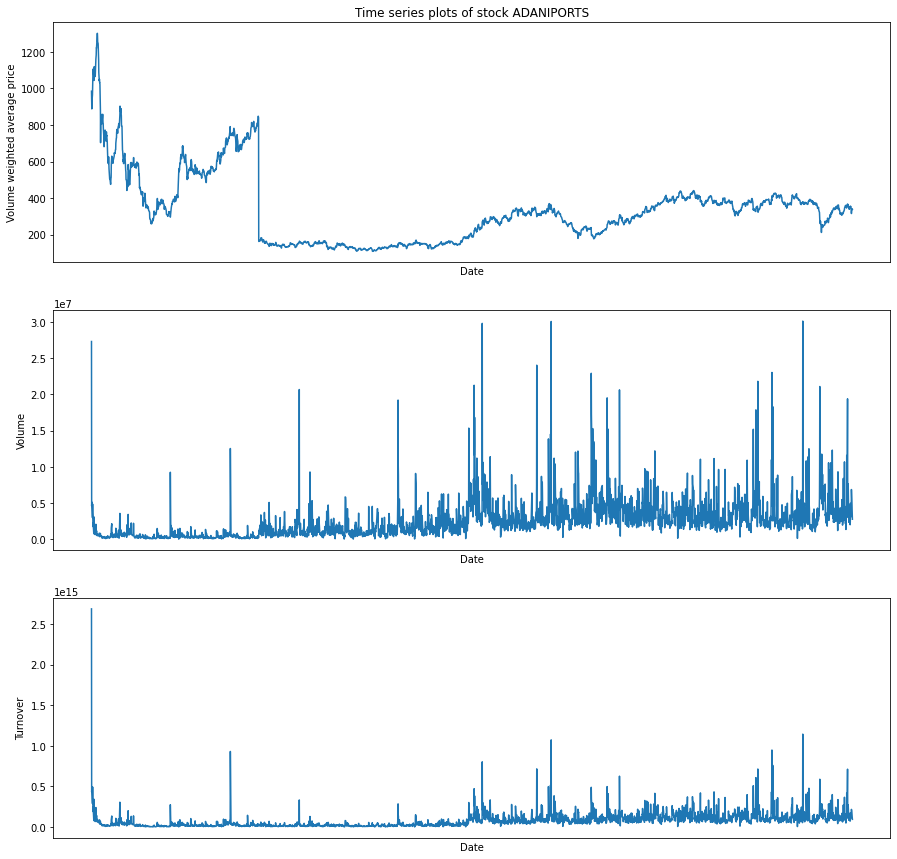

In [85]:
import matplotlib.pyplot as plt
names = df1['Symbol'].cat.categories
example = df1[df1['Symbol'] == names[0]]
fig, ax = plt.subplots(3, 1, figsize=(15,15))
ax[0].plot(example['Date'], example['VWAP'])
ax[0].set_xticks([])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Volume weighted average price')
ax[1].plot(example['Date'], example['Volume'])
ax[1].set_xticks([])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[2].plot(example['Date'], example['Turnover'])
ax[2].set_xticks([])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Turnover')
ax[0].set_title('Time series plots of stock %s' % names[0])
plt.savefig('p1.png')

In [86]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
ls0 = []
for i in names:
    subdf = df1[df1['Symbol'] == i]
    ls0.append(ndiffs(subdf['VWAP'], test='adf'))
ls0  # Most values are 1
max(ls0) # We only need 1st order differencing

1

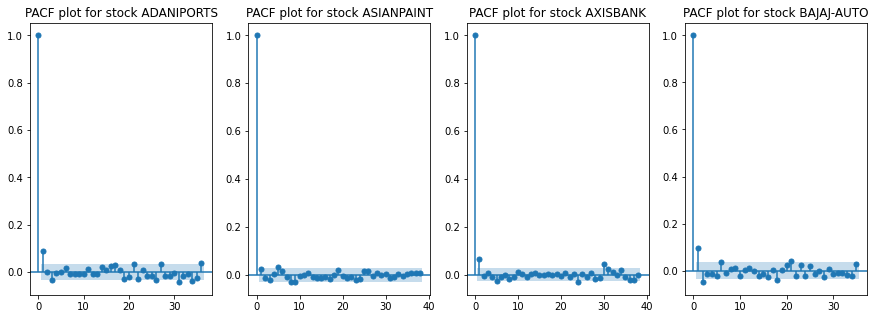

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    subdf = df1[df1['Symbol'] == names[i]]
    plot_pacf(subdf['VWAP'].diff().dropna(), ax=ax[i])
    ax[i].set_title('PACF plot for stock %s' % names[i])
plt.savefig('p2.png')

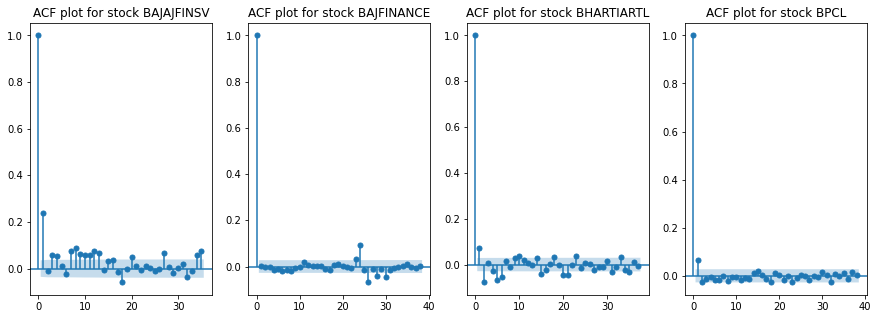

In [88]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))
for i in range(4):
    subdf = df1[df1['Symbol'] == names[i+4]]
    plot_acf(subdf['VWAP'].diff().dropna(), ax=ax[i])
    ax[i].set_title('ACF plot for stock %s' % names[i+4])
plt.savefig('p3.png')

In [89]:
mlist = []
for i in names:
    subdf = df1[df1['Symbol'] == i]
    m = ARIMA(list(subdf['VWAP']), order=(1,1,1))
    mlist.append(m.fit(disp=0))

ADANIPORTS
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJAJFINSV
BAJFINANCE
BHARTIARTL
BPCL
BRITANNIA
CIPLA
COALINDIA
DRREDDY
EICHERMOT
GAIL
GRASIM
HCLTECH
HDFC
HDFCBANK
HEROMOTOCO
HINDALCO
HINDUNILVR
ICICIBANK
INDUSINDBK
INFRATEL
INFY
IOC
ITC
JSWSTEEL
KOTAKBANK
LT
M&M
MARUTI
NESTLEIND
NTPC
ONGC
POWERGRID
RELIANCE
SBIN
SHREECEM
SUNPHARMA
TATAMOTORS
TATASTEEL
TCS
TECHM
TITAN
ULTRACEMCO
UPL
VEDL
WIPRO
ZEEL
